In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

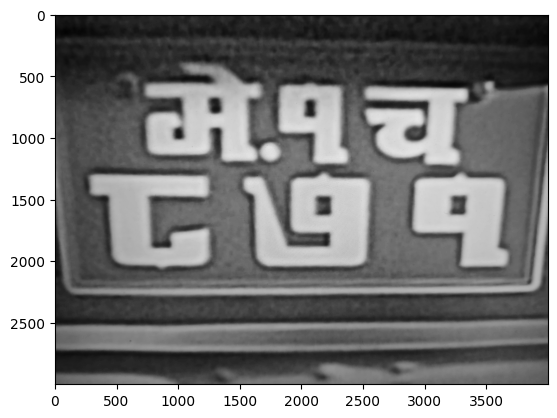

In [3]:
image = cv2.imread('../images/license2.jpg',0)
plt.imshow(image, cmap='gray')

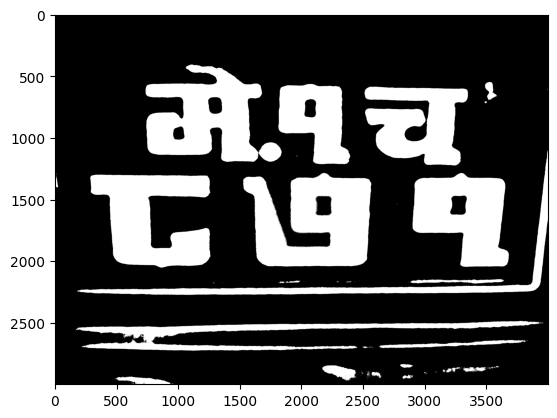

In [14]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
ret, thresh = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

In [17]:
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")

In [21]:
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 60
upper = total_pixels // 20

In [22]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue
 
    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 
    # If the number of pixels in the component is between lower bound and upper bound, 
    # add it to our mask
    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)

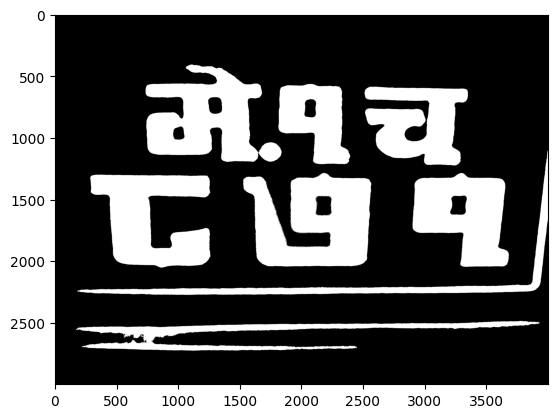

In [23]:
plt.imshow(mask,cmap='gray')

In [26]:
# Find contours and get bounding box for each contour
contours, hierarchy= cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in contours]

In [27]:
import functools

# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

In [28]:
boundingBoxes

[(735, 410, 1104, 790),
 (1812, 567, 584, 651),
 (2512, 589, 839, 640),
 (180, 1106, 3820, 1172),
 (1526, 1287, 1040, 760),
 (2901, 1289, 782, 761),
 (286, 1302, 975, 755),
 (169, 2488, 3762, 242)]